# Case Study on Working with MySQL using Python

## <font color='blue'> Table Of Contents </font>
- Problem Statement
- Load required libraries
- Connect to DB using mysql-connector-python package
- Create database named `lpg`
- Create tables and insert data into tables as specified in the question
- Read all the questions and write sql queries to meet the objective 

##  <font color='blue'> Problem Description </font>

An LPG company wants to maintain,`Customer’s details` such as Customer Id, Name, Gender, Address, Phone No, Connection Type which is product Type (14.2 Kg or 19.0 Kg or 5Kg cylinders), Order Id, Order Date, Quantity (No of cylinders ordered), Payment Type, Ordered Status (Ordered or Cancelled), Order cancelled date, Reason for Order Cancellation, Invoice Id, Date of Invoice, Delivery Status (Delivered or Undelivered), If Undelivered, Date of bill cancelled, and Reason for Undelivery, Price of Product in every Month and Year.

Having all these details in place we need to create a Database called `LPG` and various tables in it. The tables needed and attributes which need to be in every table are given by the Organization. All you have to do is create tables with data in it and some queries so that the Organization can retrieve required information.


### lpg schema:

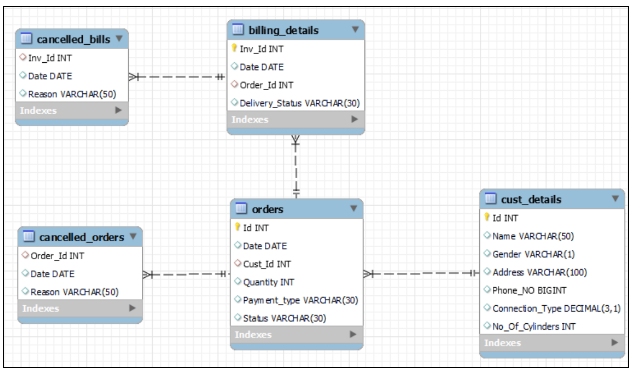

In [1]:
#Load required libraries
import mysql.connector
import pandas as pd

### Connect to DB using mysql-connector-python package

In [2]:
## Lets connect to Mysql server and choose the database('lpg') while connecting to the server
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="password")
# creating a cursor object
cursorObject = connection.cursor()

### Create a database named 'lpg'

In [3]:
## Lets make a connection to Mysql server and create a database named 'lpg'
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="password")
 
## creating a cursor object
cursorObject = connection.cursor()
 
## creating database
cursorObject.execute("CREATE DATABASE lpg")

## closing the connection after creating a database('e_commerce')
connection.close()

### -- -- 1. Write a program to create below tables in the database LPG

#### Table: cust_details
| Columns | Datatype |
| --- | --- | 
| **Id** | int AI PK |
| Name | varchar(50) |
| Gender | varchar(1) |
| Address | varchar(100) |
| Phone_NO | bigint |
| Connection_Type | decimal(3,1) |
| No_Of_Cylinders | int |

#### Table: orders
| Columns | Datatype |
| --- | --- | 
| **Id** | int AI PK |
| Date | date |
| **Cust_Id** | int FK |
| Qunatity | int |
| Payment_type | varchar(30) |
| Status | varchar(30) |

#### Table: cancelled_orders
| Columns | Datatype |
| --- | --- | 
| **Order_Id** | int FK |
| Date | date |
| Reason | varchar(50) |

#### Table:  billing_details
| Columns | Datatype |
| --- | --- | 
| **Inv_Id** | int AI PK |
| Date | date |
| **Order_Id** | int FK |
| Delivery_Status | varchar(30) |

#### Table:  cancelled_bills
| Columns | Datatype |
| --- | --- | 
| **Inv_Id** | int FK |
| Date | date |
| Reason | varchar(50) |

#### Table:  pricing
| Columns | Datatype |
| --- | --- | 
| Type | decimal(3,1) |
| Month | varchar(10) |
| Year | int |
| Price | int |

In [4]:
## Again connect to the Mysql server and while connecting Choose 'LPG' database

connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="password",
                                     database = 'LPG')
 
## creating a cursor object
cursorObject = connection.cursor()

In [5]:
## Solution for Q1: Creating tables 

table_creation_query = """create table Cust_Details( Id int primary key , Name varchar(50),Gender varchar(1), 
                          Address varchar(100), Phone_NO bigint, Connection_Type decimal(3,1), No_Of_Cylinders int);

                          create table Orders(Id int primary key , Date date, Cust_Id int, Quantity int, 
                          Payment_type varchar(30), Status varchar(30), foreign key(Cust_Id) references Cust_details(Id));

                          create table Cancelled_Orders(Order_Id int, Date date, Reason varchar(50), 
                          foreign key(Order_Id) references Orders(Id));

                          create table Billing_Details(Inv_Id int Primary key, Date date, Order_Id int, 
                          Delivery_Status varchar(30), foreign key(Order_Id) references Orders(Id));

                          create table Cancelled_Bills(Inv_Id int, Date date, Reason varchar(50), 
                          foreign key(Inv_Id) references billing_details(Inv_Id));

                          create table Pricing(Type decimal(3,1), Month varchar(10), Year int, Price int);"""
                  
# Executing the query
cursorObject.execute(table_creation_query)

### -- -- 2. Insert data to tables. Below is the sample data for your information.
#### `Note:` If you are getting any error while inserting the data into tables, Kindly close the connection and reconnect

#### Table:  cust_details
| Id | Name | Gender | Address | Phone_No | Connection_Type | No_of_Cylinders |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | Harish | M | 1-2, bglr | 1987654322 | 14.2 | 1 |
| 2 | Amisha | F | 32-12, bglr | 1614322387 | 14.2 | 1 |
| 3 | Ujjawal | M | 19-0, gurgaon | 1871614322 | 14.2 | 1 |
| 4 | Anu | F | 2-10, hyd | 1000614322 | 19.0 | 5 |
| 5 | Rakshitha | F | 3-1-3, chennai | 1614322551 | 19.0 | 10 |
| 6 | Varuni | F | 10-4, gurgaon | 1432245789 | 14.2 | 1 |
| 7 | Vamshi | M | 31-14, hyd | 1443324578 | 19.0 | 6 |

In [6]:
## After creating tables close the connection and reconnect to the server for inserting the data 

## closing the connection 
connection.close()
## Lets make a connection to Mysql server and choose database 'e_commerce'
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="password",
                                     database='lpg')
## creating a cursor object
cursorObject = connection.cursor()

In [7]:
## Solution for Q2: Inserting data to the tables

## Inserting data into "Cust_Details"

insert_cust_details = """INSERT INTO cust_details (ID , NAME, Gender, Address, Phone_NO, Connection_Type, No_Of_Cylinders) 
                       VALUES (%s, %s, %s, %s, %s, %s, %s)"""

val = [(1,'Harish', 'M', '1-2, bglr', 1987654322, 14.2, 1),(2,'Amisha', 'F', '32-12, bglr', 1614322387, 14.2, 1),
       (3,'Ujjawal', 'M', '19-0, gurgaon', 1871614322, 14.2, 1),(4,'Anu', 'F', '2-10, hyd', 1000614322, 19.0, 5),
       (5,'Rakshitha', 'F', '3-1-3, chennai', 1614322551, 19.0, 10),(6,'Varuni', 'F', '10-4, gurgaon', 1432245789, 14.2, 1),
       (7,'Vamshi', 'M', '31-14, hyd', 14433245789, 19.0, 6)]
   
cursorObject.executemany(insert_cust_details, val)
connection.commit()

#### Table:  Orders
| Id | Date | Cust_Id | Quantity | Payment_Type | Status | 
| --- | --- | --- | --- | --- | --- | 
| 1 | 2021-10-01 | 6 | 1 | online | cancelled |
| 2 | 2021-10-01 | 3 | 1 | POD | Ordered |
| 3 | 2021-10-02 | 5 | 4 | POD | cancelled |
| 4 | 2021-10-03 | 6 | 1 | POD | Ordered |
| 5 | 2021-10-04 | 3 | 1 | online | Ordered |
| 6 | 2021-11-05 | 6 | 1 | online | Ordered |
| 7 | 2021-11-06 | 4 | 4 | online | Ordered |
| 8 | 2021-11-07 | 5 | 9 | POD | Ordered |
| 9 | 2021-11-09 | 7 | 5 | online | Ordered |

In [8]:
## Inserting data into "Orders"   

insert_Orders = """INSERT INTO Orders 
                       (Id,Date, Cust_Id, Quantity, Payment_type, Status) 
                       VALUES (%s,%s, %s, %s, %s, %s)"""

val = [(1,'2021-10-01', 6, 1, 'online', 'cancelled'),
       (2,'2021-10-01', 3, 1, 'POD', 'Ordered'),(3,'2021-10-02', 5, 4, 'POD', 'Cancelled'),
       (4,'2021-10-03', 6, 1, 'POD','Ordered'),(5,'2021-10-04', 3, 1, 'Online', 'Ordered'),
       (6,'2021-11-05', 6, 1, 'Online', 'Ordered'),(7,'2021-11-06', 4, 4, 'Online', 'Ordered'),
       (8,'2021-11-07', 5, 9, 'POD', 'Ordered'),(9,'2021-11-09', 7, 5, 'Online', 'Ordered')]
   
cursorObject.executemany(insert_Orders, val)
connection.commit()

#### Table:  cancelled_orders
| Order_Id | Date | Reason | 
| --- | --- | --- | 
| 1 | 2021-10-02 | Out of Station | 
| 3 | 2021-10-03 | Mistakenly Ordered | 

In [9]:
## Inserting data into "cancelled_orders

insert_cancelled_orders = """INSERT INTO cancelled_orders 
                       (Order_Id, Date, Reason) 
                       VALUES (%s, %s, %s)"""

val = [(1, '2021-10-02', 'Out of Station'),
       (3, '2021-10-03', 'Mistakenly Ordered')]
   
cursorObject.executemany(insert_cancelled_orders, val)
connection.commit()

#### Table:  billing_details
| Inv_Id | Date | Order_Id | Delivery_Status | 
| --- | --- | --- | --- | 
| 1 | 2021-10-03 | 2 | Undelivered | 
| 2 | 2021-10-04 | 4 | Delivered | 
| 3 | 2021-10-06 | 5 | Delivered | 
| 4 | 2021-11-06 | 6 | Delivered |
| 5 | 2021-11-06 | 7 | Delivered |
| 6 | 2021-11-08 | 8 | Delivered | 

In [10]:
## Inserting data into "billing_details"

insert_billing_details = """INSERT INTO billing_details 
                           (Inv_Id,Date,Order_Id, Delivery_Status) 
                            VALUES (%s,%s, %s, %s)"""

val = [(1,'2021-10-03', 2, 'Undelivered'),(2,'2021-10-04', 4, 'Delivered'),(3,'2021-10-06', 5, 'Delivered'),
       (4,'2021-11-06', 6, 'Delivered'),(5,'2021-11-06', 7, 'Delivered'),(6,'2021-11-08', 8, 'Delivered')]
   
cursorObject.executemany(insert_billing_details, val)
connection.commit()

#### Table:  cancelled_bills
| Inv_Id | Date | Reason | 
| --- | --- | --- |
| 1 | 2021-10-04 | Insufficient_Amount |  

In [11]:
## Inserting data into "cancelled_bills"

insert_cancelled_bills = """INSERT INTO cancelled_bills 
                           (Inv_Id, Date, Reason) 
                            VALUES (%s, %s, %s)"""

val = [(2, '2021-10-04', 'Insufficient Amount')]
   
cursorObject.executemany(insert_cancelled_bills, val)
connection.commit()

#### Table:  Pricing
| Type | Month | Year | Price | 
| --- | --- | --- | --- | 
| 14.2 | Jan | 2021 | 925 | 
| 19.0 | Jan | 2021 | 1223 |
| 5.0 | Jan | 2021 | 352 |
| 14.2 | Feb | 2021 | 931 |
| 19.0 | Feb | 2021 | 1025 |
| 5.0 | Feb | 2021 | 361 |
| 14.2 | March | 2021 | 910 |
| 19.0 | March | 2021 | 1225 |
| 5.0 | March | 2021 | 365 |
| 14.2 | April | 2021 | 942 |
| 19.0 | April | 2021 | 1300 | 
| 5.0 | April | 2021 | 330 |
| 14.2 | May | 2021 | 942 |
| 19.0 | May | 2021 | 1280 | 
| 5.0 | June | 2021 | 333 |
| 14.2 | June | 2021 | 958 |
| 19.0 | June | 2021 | 1283 |
| 5.0 | June | 2021 | 320 |
| 14.2 | July | 2021 | 950 |
| 19.0 | July | 2021 | 1295 |
| 5.0 | July | 2021 | 330 |
| 14.2 | August | 2021 | 947 | 
| 19.0 | August | 2021 | 1298 |
| 5.0 | August | 2021 | 337 |
| 14.2 | sept | 2021 | 963 | 
| 19.0 | sept | 2021 | 1306 |
| 5.0 | sept | 2021 | 340 |
| 14.2 | Oct | 2021 | 960 |
| 19.0 | Oct | 2021 | 1310 |
| 5.0 | Oct | 2021 | 347 |
| 14.2 | Nov | 2021 | 970 |
| 19.0 | Nov | 2021 | 1313 |
| 5.0 | Nov | 2021 | 350 |
| 14.2 | Dec | 2021 | 974 |
| 19.0 | Dec | 2021 | 1320 | 
| 5.0 | Dec | 2021 | 362 |
| 14.2 | Jan | 2022 | 999 |
| 19.0 | Jan | 2022 | 1309 |
| 5.0 | Jan | 2022 | 359 | 

In [12]:
## Inserting data into "pricing"

insert_pricing = """INSERT INTO pricing 
                           (Type, Month, Year, Price) 
                            VALUES (%s, %s, %s, %s)"""

val = [(14.2, 'January', 2021, 925),(19.0, 'January', 2021, 1223),(5.0, 'January', 2021, 352),(14.2, 'February', 2021, 931),
      (19.0, 'February', 2021, 1025),(5.0, 'February', 2021, 361),(5.0, 'February', 2021, 361),(14.2, 'March', 2021, 910),
      (19.0, 'March', 2021, 1225),(5.0, 'March', 2021, 365),(14.2, 'April', 2021, 942),(19.0, 'April', 2021, 1300),
      (5.0, 'April', 2021, 330),(14.2, 'May', 2021, 942),(19.0, 'May', 2021, 1280),(5.0, 'May', 2021, 333),
      (14.2, 'June', 2021, 958),(19.0, 'June', 2021, 1283),(5.0, 'June', 2021, 320),(14.2, 'July', 2021, 950),
      (19.0, 'July', 2021, 1295),(5.0, 'July', 2021, 330),(14.2, 'August', 2021, 947),(19.0, 'August', 2021, 1298),
      (5.0, 'August', 2021, 337),(14.2, 'September', 2021, 963),(19.0, 'September', 2021, 1306),(5.0, 'September', 2021, 340),
      (14.2, 'October', 2021, 960),(19.0, 'October', 2021, 1310),(5.0, 'October', 2021, 347),(14.2, 'November', 2021, 970),
      (19.0, 'November', 2021, 1313),(5.0, 'November', 2021, 350),(14.2, 'December', 2021, 974),(19.0, 'December', 2021, 1320),
      (5.0, 'December', 2021, 362),(14.2, 'February', 2022, 999),(19.0, 'January', 2022, 1309),(5.0, 'January', 2022, 359)]
   
cursorObject.executemany(insert_pricing, val)
connection.commit()

### -- --  <font color='blue'> Q1.</font>  Write a query to display a table with customer Id, Name, Connection_Type and No_Of Cylinders ordered from orders table.


In [13]:
question_one = """select C.Id,C.Name, C.Connection_Type, Q.No_of_cylinders from Cust_Details as C inner join 
                   (select Cust_Id, sum(Quantity) as no_of_cylinders 
                   from orders where status = 'ordered' group by cust_Id) 
                   as Q on C.Id = Q.cust_id """

cursorObject.execute(question_one)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['ID','Name','Connection_Type','No. of Cyclinders'])
output_df

,ID,Name,Connection_Type,No. of Cyclinders
0,3,Ujjawal,14.2,2
1,4,Anu,19.0,4
2,5,Rakshitha,19.0,9
3,6,Varuni,14.2,2
4,7,Vamshi,19.0,5


### --  --<font color='blue'> Q2.</font> Find Last Delivery Date from billing_details table of every customer and display customer Id and Name, Last_Delivery_Date and Quantity using Joins and Subquery. (Note that the date in billing_details will act as last delivery date)


In [14]:
question_two = """select C.Id as Cust_Id, C.Name, Q.Last_Delivery_Date, Q.Quantity from cust_details as C inner join 
                 (select cust_id, max(Delivery_Date) as Last_Delivery_Date, Quantity from 
                 (select O.id, O.cust_id, O.Quantity,D.Delivery_Date from orders as O inner join 
                 (select Order_Id, date as Delivery_Date from billing_details where Delivery_Status = 'Delivered') 
                 as D on O.id = D.Order_id) 
                 as P group by (cust_id)) 
                 as Q on Q.cust_id = C.Id
                 order by cust_id """

cursorObject.execute(question_two)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['Customer_id','Name','Last_Delivery_Date', 'Quantity'])
output_df

,Customer_id,Name,Last_Delivery_Date,Quantity
0,3,Ujjawal,2021-10-06,1
1,4,Anu,2021-11-06,4
2,5,Rakshitha,2021-11-08,9
3,6,Varuni,2021-11-06,1


### --  --<font color='blue'> Q3.</font> Display customer Id, Name, undelivered date and reason for undelivery using joins.

In [15]:
question_three = """select C.Id as Cust_Id, C.Name, R.Cancelled_Bill_Date, R.Reason from cust_details as C inner join 
                   (select cust_id, Cancelled_Bill_Date, Reason from orders as O inner join 
                   (select B.order_id, P.Date as Cancelled_Bill_Date, P.Reason from billing_details as B inner join 
                   (select * from cancelled_bills) 
                   as P on P.Inv_Id = B.Inv_Id) 
                   as Q on Q.order_id = O.Id) 
                   as R on R.cust_id = C.Id """

cursorObject.execute(question_three)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['Customer_id','Name','undelivered date', 'Reason'])
output_df

,Customer_id,Name,undelivered date,Reason
0,6,Varuni,2021-10-04,Insufficient Amount


### --  --<font color='blue'> Q4.</font> Display customer Id, Name, Date and reason for Cancelled Orders of all cancellations made by all customers.


In [16]:
question_four = """select C.Id, C.Name, R.Cancelled_Order_Date, R.Reason from cust_details as C inner join 
                   (select O.cust_id, Q.Cancelled_Order_Date, Q.Reason from orders as O inner join 
                   (select O.Id, P.Date as Cancelled_Order_Date, P.Reason from orders as O inner join 
                   (select * from cancelled_orders) 
                   as P on P.Order_Id = O.Id) 
                   as Q on Q.Id = O.Id) 
                   as R on R.cust_id = C.Id"""

cursorObject.execute(question_four)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['Customer_id','Name','Date', 'Reason'])
output_df

,Customer_id,Name,Date,Reason
0,6,Varuni,2021-10-02,Out of Station
1,5,Rakshitha,2021-10-03,Mistakenly Ordered


### --  --<font color='blue'> Q5.</font>  Display one customer from each product category who purchased maximum no of cylinders with Connection_Type, Cust_Id, Name and Quantity purchased.

In [17]:
question_five = """select distinct(Connection_Type), Cust_Id, Name, max(no_of_cylinders) from 
                (select C.Id as Cust_Id, C.Name, P.no_of_cylinders, C.Connection_Type from Cust_Details as C inner join 
                (select Cust_Id, sum(Quantity) as no_of_cylinders from orders where status = 'ordered' group by cust_Id) 
                as P on P.Cust_Id = C.Id) 
                as Q group by Connection_Type"""

cursorObject.execute(question_five)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['connection_type','Cust_id','Name', 'Quantity purcahsed'])
output_df

,connection_type,Cust_id,Name,Quantity purcahsed
0,14.2,3,Ujjawal,2
1,19.0,4,Anu,9


### --  --<font color='blue'> Q6.</font>  Display Customer Id, Successfully_Delivered  and value of customer based on purchase of cylinders using SQL Case Statement. when Successfully_Delivered >= 8 then 'Highly Valued' when  Successfully_Delivered between 5 and 7 then 'Moderately Valued' Else 'Low Valued'


In [18]:
question_six = """select Cust_Id, Successfully_Delivered,
                  Case 
                      when Successfully_Delivered >= 8 then 'Highly Valued'
                      when Successfully_Delivered between 5 and 7 then 'Moderately Valued'
                 Else 'Low Valued'
                 End as Value from 
                (select O.Cust_Id, sum(O.Quantity) as Successfully_Delivered from Orders as O inner join 
                (select Order_Id from billing_details where delivery_status = 'Delivered') 
                as P on P.Order_Id = O.Id group by Cust_Id) 
                as Q """

cursorObject.execute(question_six)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['Cust_id','Successfully_Delivered', 'Value'])
output_df

,Cust_id,Successfully_Delivered,Value
0,6,2,Low Valued
1,3,1,Low Valued
2,4,4,Low Valued
3,5,9,Highly Valued


### --  --<font color='blue'> Q7.</font>  Display Customer Id, Name, Delivery Date of all deliveries received by customer for all customers

In [19]:
question_seven = """select C.Id as Cust_Id, C.Name,Delivery_Date from cust_details as C inner join (
                  select cust_id, Delivery_Date from 
                  (select O.id, O.cust_id, D.Inv_Id, D.Delivery_Date from orders as O inner join 
                  (select Inv_Id, Order_Id, date as Delivery_Date from billing_details where Delivery_Status = 'Delivered') 
                  as D on O.id = D.Order_id) 
                  as P) 
                  as Q on Q.cust_id = C.Id order by Cust_Id;"""

cursorObject.execute(question_seven)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['Cust_id','Name','Delivery_Date'])
output_df

,Cust_id,Name,Delivery_Date
0,3,Ujjawal,2021-10-06
1,4,Anu,2021-11-06
2,5,Rakshitha,2021-11-08
3,6,Varuni,2021-10-04
4,6,Varuni,2021-11-06


### --  -- <font color='blue'> Q8.</font>  Find the amount paid by the customer for every delivery taken for all customers with following details Customer_Id, Name, Order_Id, Order_Date, Inv_Id, Delivery_Date, Connection_Type and Price.


In [20]:
question_eight = """select Q.Customer_Id, Q.Name, Q.Order_Id, Q.Order_Date, Q.Inv_Id, Q.Delivery_Date, Q.Connection_Type,Pricing.Price 
                    from Pricing inner join 
                    (select C.Id as Customer_Id, C.Name, P.Order_Id, P.Order_Date, P.Inv_Id, P.Delivery_Date, 
                    C.Connection_Type, monthname(Delivery_Date) as month, year(Delivery_Date) as Year 
                    from cust_details as C inner join 
                    (select O.Id as Order_Id, O.date as Order_Date, O.Cust_Id, D.Inv_Id, D.Delivery_Date 
                    from orders as O inner join 
                    (select Inv_Id, Order_Id, date as Delivery_Date
                    from billing_details where Delivery_Status = 'Delivered') 
                    as D on D.Order_Id = O.Id) 
                    as P on P.Cust_Id = C.Id) 
                    as Q on Q.Month = Pricing.Month 
                    and 
                    Q.Year = Pricing.Year 
                    and 
                    Q.Connection_Type = Pricing.Type order by Customer_Id"""

cursorObject.execute(question_eight)
 
output = cursorObject.fetchall()
   
## Lets put the output of this query in pandas DataFrame 
output_df = pd.DataFrame(output, columns=['customer_id','Name','Order_id','Order_date','Inv_id',
                                          'Delivery_date','Connection_type','Price'])
output_df

,customer_id,Name,Order_id,Order_date,Inv_id,Delivery_date,Connection_type,Price
0,3,Ujjawal,5,2021-10-04,3,2021-10-06,14.2,960
1,4,Anu,7,2021-11-06,5,2021-11-06,19.0,1313
2,5,Rakshitha,8,2021-11-07,6,2021-11-08,19.0,1313
3,6,Varuni,4,2021-10-03,2,2021-10-04,14.2,960
4,6,Varuni,6,2021-11-05,4,2021-11-06,14.2,970


In [21]:
## closing the connection
connection.close()

------
### Happy Learning:)
------